In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
import seaborn as sns
from intercluster.plotting import *

%load_ext autoreload
%autoreload 2

In [2]:
# This assumes tex is installed in your system, 
# if not you may simply remove most of this aside from font.size
# To get tex working on linux run the following:
# `sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super`
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": [],
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.size": 18
})

palette = sns.color_palette("husl", 8)
cmap = ListedColormap(palette)



subset_colors = [cmap(5), cmap(1), cmap(3), cmap(6), cmap(7), cmap(0)]
cmap_subset = ListedColormap(subset_colors)

no_oblique_subset_colors = [cmap(0), cmap(5), cmap(1), cmap(6), cmap(7)]
no_oblique_cmap_subset = ListedColormap(no_oblique_subset_colors)

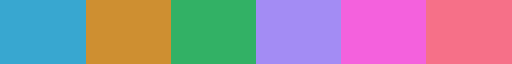

In [3]:
cmap_subset

### Coverage-Cost Experiments

In [4]:
# Load experiment results
dataset = 'mnist'
fname = "../data/experiments/" + dataset + "/coverage_comparison_exp_sample.csv"
experiment_df = pd.read_csv(fname, header=[0, 1, 2, 3], index_col=0)

In [5]:
# Compute statistics:
grouped = experiment_df.T.groupby(level = [0,1,2])
mean_df = grouped.mean().T
std_df = grouped.std().T

In [13]:
table_df.index

MultiIndex([(                    'coverage',           'Forest', ...),
            (                    'coverage',           'Forest', ...),
            (                    'coverage',           'Forest', ...),
            (                    'coverage', 'Forest-Depth-IMM', ...),
            (                    'coverage', 'Forest-Depth-IMM', ...),
            (                    'coverage', 'Forest-Depth-IMM', ...),
            (                    'coverage',              'IMM', ...),
            (                    'coverage',     'IMM-outliers', ...),
            (                    'coverage',     'IMM-outliers', ...),
            (                    'coverage',     'IMM-outliers', ...),
            (                    'coverage',           'KMeans', ...),
            (              'distance-ratio',           'Forest', ...),
            (              'distance-ratio',           'Forest', ...),
            (              'distance-ratio',           'Forest', ...),
      

In [16]:
table_df = mean_df.iloc[-5,:].to_frame()
table_df.loc['weighted-average-rule-length',:]

6
Forest           Forest            2.000000
                 IMM               6.718571
                 KMeans                 NaN
Forest-Depth-IMM Forest-Depth-IMM  3.136019
                 IMM               6.718571
                 KMeans                 NaN
IMM              IMM               6.718571
IMM-outliers     IMM               6.718571
                 IMM-outliers      6.093714
                 KMeans                 NaN
KMeans           KMeans                 NaN

### Plotting

In [7]:
#colormap = no_oblique_cmap_subset
#module_list = [m for m in mean_df['normalized-clustering-cost'].columns if m not in baseline_list]
#module_list = [m for m in mean_df['normalized-clustering-cost'][model].columns]

colormap = cmap_subset
baseline_list = ['KMeans-Full', 'IMM-Full']
module_list = ['KMeans', 'IMM', 'Forest', 'Forest-Depth-IMM', 'SVM', 'IMM-outliers']
color_dict = {mod : i for i,mod in enumerate(module_list)}

(0.0, 1.0, 0.0, 1.0)

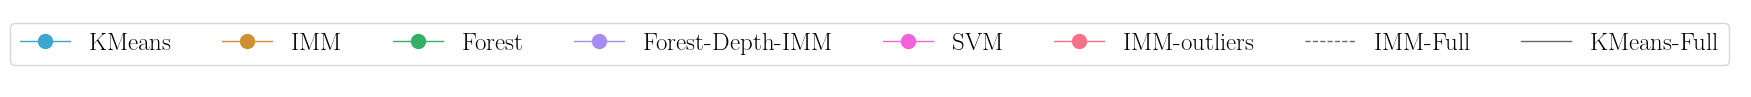

In [49]:
# Legend:
fig, ax = plt.subplots(figsize = (6,1))
legend_elements = [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=10,
        color=colormap(i),
        lw=1,
        label=mod,
        alpha=1
    )
    for i,mod in enumerate(module_list)
]

legend_elements += [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=0,
        color='k',
        lw=1,
        linestyle = 'dashed',
        label="IMM-Full",
        alpha=0.6
    )
]

legend_elements += [
    mlines.Line2D(
        [], [],
        marker = 'o',
        markersize=0,
        color='k',
        lw=1,
        linestyle = '-',
        label="KMeans-Full",
        alpha=0.6
    )
]

ax.legend(handles=legend_elements, ncol=len(module_list) + len(baseline_list))
ax.axis('off')
#plt.savefig('../figures/relative_coverage/legend.png', bbox_inches = 'tight', dpi = 300)

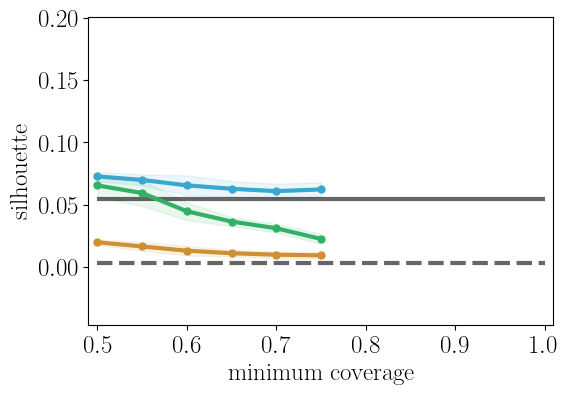

In [22]:
model = 'Forest'
#measure = 'normalized-clustering-cost'
measure = 'silhouette'
xlabel = 'minimum coverage'
ylabel = measure if measure != 'normalized-clustering-cost' else 'cost'
fname = '../figures/relative_coverage/' + ylabel + '/' + dataset + '/' + model + '.png'
#fname = None

plot_colors = [colormap(color_dict[mod]) for mod in mean_df[measure][model].columns]
plot_cmap = ListedColormap(plot_colors)
measure_df = mean_df[measure]

# Measurements
if measure == 'normalized-clustering-cost':
    norm = mean_df[measure]['KMeans']['KMeans'].iloc[0]
else:
    norm = 1

measure_df = mean_df[measure] / norm

plot_df = mean_df[measure][model]
plot_df['KMeans-Full'] = mean_df[measure]['KMeans']
plot_df['IMM-Full'] = mean_df[measure]['IMM']
plot_df /= norm

plot_std_df = std_df[measure][model]
plot_std_df['KMeans-Full'] = std_df[measure]['KMeans']
plot_std_df['IMM-Full'] = std_df[measure]['IMM']
plot_std_df /= norm

# Domain:
#domain_df = mean_df['coverage'][model]
domain_array = np.array([list(np.linspace(0.5,1,11))] * len(plot_df.columns)).T
domain_df = pd.DataFrame(domain_array, columns = plot_df.columns)

xlim = (0.49, 1.01)
ylim = (measure_df.min().min() - 0.05, measure_df.max().max() + 0.05)
experiment_plotter(
    plot_df,
    plot_std_df,
    domain_df,
    xlabel = xlabel,
    ylabel = ylabel,
    cmap = plot_cmap,
    baseline_list = ['KMeans-Full', 'IMM-Full'],
    legend = False,
    xlim = xlim,
    ylim = ylim,
    filename = fname,
)

In [68]:
plot_df.min().min()

0.04956912864914474

(10.0, 14.0)

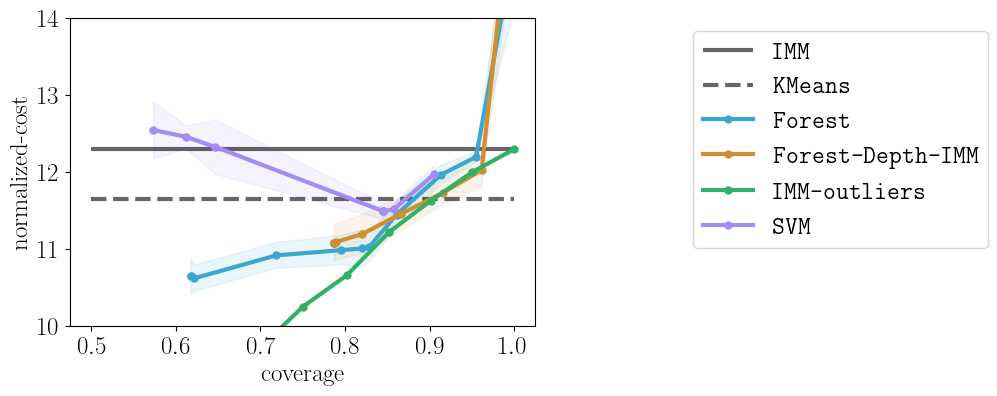

In [31]:
fname = None
#fname = '../figures/coverage/fashion.png'
experiment_plotter(
    mean_df['normalized-clustering-cost'],
    std_df['normalized-clustering-cost'],
    domain_df = mean_df['coverage'],
    xlabel = 'coverage',
    ylabel = 'normalized-cost',
    cmap = colormap,
    baseline_list = ['KMeans', 'IMM'],
    legend = True,
    filename = fname,
)
plt.ylim(10,14)